# 10 Long Short Term Memory
**Adapted from Deep Learning with Pyton by Francois Chollet**

https://github.com/fchollet/deep-learning-with-python-notebooks

### LSTM Example

We will set up a model using a LSTM layer and train it on the IMDB data. Here the network is similar to the one with `SimpleRNN` we presented. We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults. 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
import keras

Preprocess the data:

In [26]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [28]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(X_train, y_train,
                   epochs=10, 
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.4994 - acc: 0.7616 - val_loss: 0.3446 - val_acc: 0.8582
Epoch 2/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.3037 - acc: 0.8818 - val_loss: 0.3710 - val_acc: 0.8338
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2399 - acc: 0.9088 - val_loss: 0.3573 - val_acc: 0.8454
Epoch 4/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2062 - acc: 0.9256 - val_loss: 0.3694 - val_acc: 0.8636
Epoch 5/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1815 - acc: 0.9345 - val_loss: 0.3008 - val_acc: 0.8810
Epoch 6/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1616 - acc: 0.9441 - val_loss: 0.3385 - val_acc: 0.8632
Epoch 7/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1493 - acc: 0.9474 - val_loss: 0.4621 - val_acc:

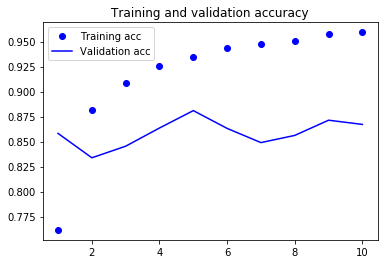

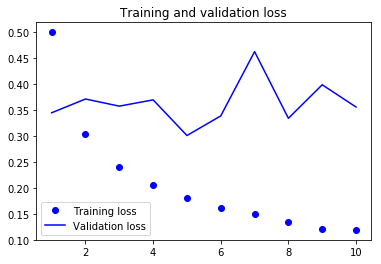

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();